In [1]:
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/Nirachaa/Downloads/summary-hour.csv')
data['date'] = pd.to_datetime(data['date'],errors = 'coerce')
data

,date,dv_time
0,2019-11-10 00:00:00,21120.000000
1,2019-11-10 01:00:00,8360.000000
2,2019-11-10 02:00:00,36097.500000
3,2019-11-10 03:00:00,6276.500000
4,2019-11-10 04:00:00,13129.000000
...,...,...
290,2019-11-23 17:00:00,16584.000000
291,2019-11-23 18:00:00,6013.500000
292,2019-11-23 19:00:00,4639.500000
293,2019-11-23 20:00:00,7763.666667


In [3]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

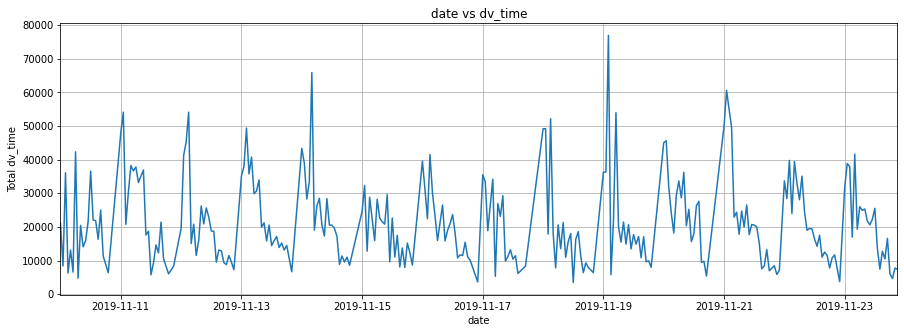

In [4]:
plt.title('date vs dv_time')
plt.ylabel('Total dv_time')
plt.xlabel('date')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(data['date'],data['dv_time'])

In [5]:
def x_scaler(x):
  sc_x = StandardScaler()
  x_normalized = sc_x.fit_transform(x)
  return x_normalized

def y_scaler(y):
  sc_y = StandardScaler()
  y_normalized = sc_y.fit_transform(y.reshape(-1, 1))
  return y_normalized

def getDays(x_data):
  days = list()
  dv_times = list()

  for day in x_data:
    days.append([day])

  for dv_time in y_all_data:
    dv_times.append(dv_time)
  return days

def getDvTimes(y_data):
  dv_times = list()

  for dv_time in y_data:
    dv_times.append(dv_time)
  return dv_times

def fitModel(kernel,c,degree,gamma,x,y):

  if kernel=='linear':
    #using a linear kernel
    lin_svr = SVR(kernel='linear',C=c)
    model = lin_svr.fit(x,y)

  if kernel=='poly':
    # #using a polynomial kernel
    poly_svr = SVR(kernel='poly',C=c,degree=degree)
    model = poly_svr.fit(x,y)

  if kernel=='rbf':
    #using a rbf kernel
    rbf_svr = SVR(kernel='rbf',C=c,gamma=gamma) 
    model = rbf_svr.fit(x,y)
  return model

def compareModelPrediction(model,x,y):
  plt.figure(figsize=(16,8))
  plt.grid(True)
  plt.autoscale(axis='x',tight=True)
  plt.scatter(x,y,color='red',label = 'Data')
  plt.plot(x,model.predict(x),color = 'green',label = 'RBF Model')
  plt.legend()
  plt.show()

In [6]:
data['index'] = data.index
data

,date,dv_time,index
0,2019-11-10 00:00:00,21120.000000,0
1,2019-11-10 01:00:00,8360.000000,1
2,2019-11-10 02:00:00,36097.500000,2
3,2019-11-10 03:00:00,6276.500000,3
4,2019-11-10 04:00:00,13129.000000,4
...,...,...,...
290,2019-11-23 17:00:00,16584.000000,290
291,2019-11-23 18:00:00,6013.500000,291
292,2019-11-23 19:00:00,4639.500000,292
293,2019-11-23 20:00:00,7763.666667,293


In [7]:
#x_all_data = data.index.values
#y_all_data = data['dv_time'].values.astype(float)
x_all_data = data.iloc[:, 2:3].values 
y_all_data = data.iloc[:, 1].values

In [8]:
test_data_size = 60
validation_data_size = 60

x_train_data = x_all_data[:-(validation_data_size+test_data_size)]
x_test_data = x_all_data[-test_data_size:]
x_validation_data = x_all_data[-(validation_data_size+test_data_size):-test_data_size]

y_train_data = y_all_data[:-(validation_data_size+test_data_size)]
y_test_data = y_all_data[-test_data_size:]
y_validation_data = y_all_data[-(validation_data_size+test_data_size):-test_data_size]

In [9]:
print(len(x_train_data))
print(len(x_test_data))
print(len(x_validation_data))

175
60
60


In [10]:
# y_train_data = getDvTimes(y_train_data)
# y_test_data = getDvTimes(y_test_data)
# y_validation_data = getDvTimes(y_validation_data)

# x_train_data = getDays(x_train_data)
# x_test_data = getDays(x_test_data)
# x_validation_data = getDays(x_validation_data)

In [11]:
x_all_data_normalized = x_scaler(x_all_data)
y_all_data_normalized = y_scaler(y_all_data)

x_train_data_normalized = x_scaler(x_train_data)
x_validation_data_normalized = x_scaler(x_validation_data)
x_test_data_normalized = x_scaler(x_test_data)

y_train_data_normalized = y_scaler(y_train_data)
y_validation_data_normalized = y_scaler(y_validation_data)
y_test_data_normalized = y_scaler(y_test_data)

In [12]:
print(x_train_data_normalized[:5])
print(y_train_data_normalized[:5])

[[-1.72218149]
 [-1.7023863 ]
 [-1.68259111]
 [-1.66279592]
 [-1.64300073]]
[[ 0.02203131]
 [-1.03165706]
 [ 1.25883519]
 [-1.2037072 ]
 [-0.63784516]]


In [13]:
#create model 3 svr model
c = 100000   #10000
kernel='rbf' #rbf,poly,linear
degree = 0.15
gamma = 0.5

model = fitModel('rbf',c,degree,gamma,x_train_data_normalized,y_train_data_normalized)

C:\Users\Nirachaa\anaconda3\envs\travel_time\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


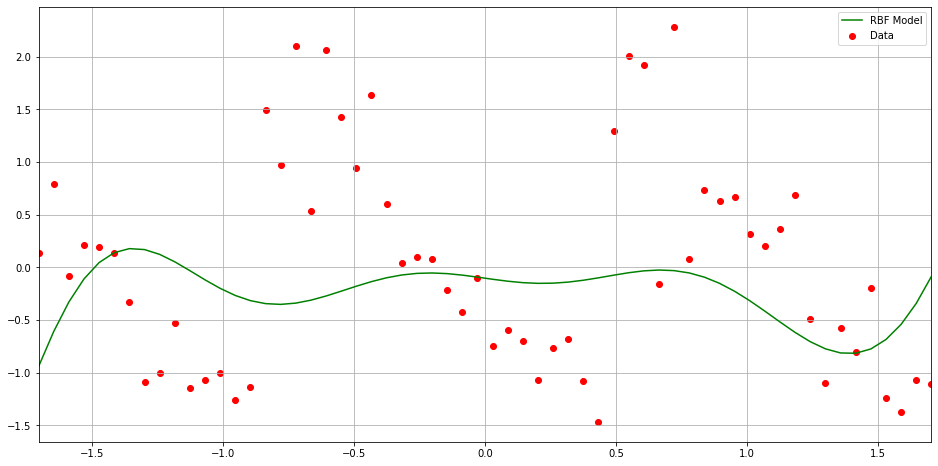

In [14]:
compareModelPrediction(model,x_test_data_normalized,y_test_data_normalized)